## Support Vector Regressor 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[-0.52942365, -1.07166506],
       [ 0.14075717, -0.56945655],
       [-0.79371896,  1.16190347],
       ...,
       [ 0.7571802 ,  1.08572124],
       [ 0.60875894, -0.27616296],
       [-0.4771789 , -0.50093519]])

In [5]:
y

array([-5.19566074e+01, -3.45310795e+01,  5.48903876e+01,  6.84821095e+01,
        2.07919607e+01,  1.16754117e+02,  7.73903155e+00, -3.11276879e+01,
        6.04976128e+01, -3.58104257e+01,  5.38906864e+01,  1.99084052e+01,
        1.63339100e+00,  7.13627256e+01,  3.02197036e+01,  4.53052354e+00,
       -5.25461214e+01,  7.12268864e+00,  6.23666022e+01, -7.02258976e+01,
        2.10220061e+01, -1.97921386e+02, -7.55273300e+01,  5.49496344e+01,
       -9.55414188e+00,  2.33463945e+01,  2.86294580e+01, -4.55166918e+01,
        7.60068522e+01,  4.27390194e+01,  2.22656380e+01, -4.88144109e+01,
        7.71101332e+01,  1.48751676e+01, -1.13735122e+02,  2.01847987e+01,
        1.31749034e+01,  5.03281508e+01, -2.25560170e+01,  6.78346914e+01,
        1.29114098e+01, -7.45000455e+01,  1.76949475e+01,  3.36592122e+01,
        2.98102587e+01,  1.07281771e+01,  3.04477725e+01,  8.28640847e+01,
        5.18547689e+01, -3.25199634e+01, -1.23430756e+01,  3.90222618e+01,
       -2.18027803e+01,  

In [6]:
pd.DataFrame(X)[0]

0     -0.529424
1      0.140757
2     -0.793719
3      0.237240
4      0.051264
         ...   
995    0.578264
996    0.014971
997    0.757180
998    0.608759
999   -0.477179
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

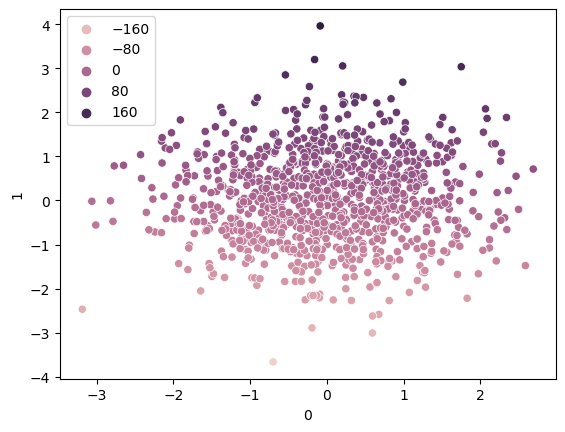

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr=SVR(kernel='linear')

In [11]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[ 4.61166083, 51.18701483]])

In [13]:
## Prediction
y_pred=svr.predict(X_test)

In [14]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test,y_pred)*100)

99.65834365152972


## Hyperparametere Tuning With SVR

In [ ]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [ ]:
grid=GridSearchCV(SVR(),param_grid=param_grid,scoring='neg_mean_squared_error',refit=True,cv=5,verbose=3)

In [19]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.976 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.971 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.971 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.976 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.971 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.971 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.975 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.975 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 100, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [21]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4)*100)

99.66131070780445
